# A1 title djsn

## Practice instructions

The objective of this activity is to learn how to characterize the structure of complex networks and become familiar with the models used to generate synthetic networks. The activity is composed of two parts:

Part 1. Structural characterization of networks

You can find four different networks labelled as net1, net2, net3 and net4 in the activityA1.zip file.  To characterize their macroscopic structure, the students should analyze (at least) the following network descriptors:

Number of nodes
Number of edges
Minimum, maximum, and average degree
Average clustering coefficient (average of the clustering coefficient of each node)
Assortativity
Average path length (average distance between all pairs of nodes)
Diameter (maximum distance between nodes in the network)
Apart from these indicators, the degree distribution provides crucial information to understand the macroscopic structure of networks. For this reason, the students should obtain the degree distribution of each network and choose its most suitable representation (histogram in linear scale or in histogram in log-log scale with logarithmic binning).

The microscopic structure of the network is instead characterized by analyzing different centralities for the nodes of the network. The students should list the 5 most central nodes according to different metrics (betweenness, degree, eigenvector) and comment the results. Are these centrality indicators providing the same information on the relevance of the nodes for the network?

PS. Visualization of these networks using networkx is discouraged due to their large size.

Part 2. Models

Based on the descriptors of the network and its degree distribution, the students should figure out the model used to generate the network. There are four possibilities: the ER model, the WS model with an intermediate rewiring probability, the BA model or the CM assuming a degree distribution which follows a power-law with $\gamma$<2.5.

To round off the activity, the students should analyze the network net5. This network is generated by a model which has not been explained in our lectures. The students should visualize the network (setting the positions of the nodes from the file ‘positions.txt’) and comment the most prominent features of the network. Is the network connected? Is it scale-free? Is the largest connected component a small-world network? From the visualization of the network, the students should propose an algorithm to generate the network. Hint: The algorithm starts by distributing the nodes randomly across space.

The delivery should include a single .zip file named ‘Groupxxx_SURNAME1_SURNAME2_A1.zip’ containing:

A brief PDF report discussing the results obtained in the two parts of the activity.
A Jupyter notebook with the code needed to reproduce the results.

In [26]:
# Install required packages for this activity
!pip install networkx numpy pandas matplotlib

## Part 1. Structural characterization of networks



In [27]:
import networkx as nx
from pathlib import Path

def _load_netfile(path):
    try:
        g = nx.read_pajek(str(path))
    except Exception:
        g = nx.read_edgelist(str(path))
    return nx.Graph(g)

nets = []
for i in range(1, 6):
    name = f'net{i}'
    try:
        existing = eval(name)
    except NameError:
        existing = None

    if isinstance(existing, (nx.Graph, nx.DiGraph, nx.MultiGraph, nx.MultiDiGraph)):
        print(f"{name} already loaded: {existing.number_of_nodes()} nodes, {existing.number_of_edges()} edges")
        nets.append(existing)
        continue

    path = Path(f'{name}.net')
    if not path.exists():
        print(f"{path} not found. Skipping {name}.")
        nets.append(None)
        continue

    try:
        g = _load_netfile(path)
        print(f"Loaded {name}: {g.number_of_nodes()} nodes, {g.number_of_edges()} edges")
        nets.append(g)
    except Exception as e:
        print(f"Failed to load {name} from {path}: {e}")
        nets.append(None)

# create variables net1..net5 for use in other cells
net1, net2, net3, net4, net5 = nets

del _load_netfile


net1 already loaded: 5000 nodes, 25000 edges
net2 already loaded: 5000 nodes, 24873 edges
net3 already loaded: 5000 nodes, 23508 edges
net4 already loaded: 5000 nodes, 24975 edges
net5 already loaded: 200 nodes, 465 edges


### Macroscopic structure

In [28]:
import networkx as nx

targets = [('net1', net1), ('net2', net2), ('net3', net3), ('net4', net4)]
results = {}

for name, G in targets:
    if G is None:
        print(f"{name}: not loaded")
        results[name] = None
        continue

    n = G.number_of_nodes()
    m = G.number_of_edges()
    degs = [d for _, d in G.degree()]
    deg_min = min(degs) if degs else 0
    deg_max = max(degs) if degs else 0
    deg_avg = sum(degs) / len(degs) if degs else 0.0

    avg_clust = nx.average_clustering(G)

    try:
        assort = nx.degree_assortativity_coefficient(G)
    except Exception:
        assort = float('nan')

    # For average path length and diameter use the largest connected component if graph is disconnected
    if n == 0:
        avg_path = float('nan')
        diam = float('nan')
    elif nx.is_connected(G):
        try:
            avg_path = nx.average_shortest_path_length(G)
            diam = nx.diameter(G)
        except Exception:
            avg_path = float('nan')
            diam = float('nan')
    else:
        largest_cc = max(nx.connected_components(G), key=len)
        H = G.subgraph(largest_cc)
        try:
            avg_path = nx.average_shortest_path_length(H)
            diam = nx.diameter(H)
        except Exception:
            avg_path = float('nan')
            diam = float('nan')

    results[name] = {
        'nodes': n,
        'edges': m,
        'deg_min': deg_min,
        'deg_max': deg_max,
        'deg_avg': deg_avg,
        'avg_clustering': avg_clust,
        'assortativity': assort,
        'average_path_length': avg_path,
        'diameter': diam,
        'largest_cc_size': len(largest_cc) if (n and not nx.is_connected(G)) else n
    }

# Print concise summary
for name, stats in results.items():
    if stats is None:
        continue
    print(f"{name}: nodes={stats['nodes']}, edges={stats['edges']}, "
          f"deg_min={stats['deg_min']}, deg_max={stats['deg_max']}, deg_avg={stats['deg_avg']:.3f}, "
          f"avg_clustering={stats['avg_clustering']:.4f}, assortativity={stats['assortativity']:.4f}, "
          f"avg_path_length={stats['average_path_length']}, diameter={stats['diameter']}, "
          f"largest_cc_size={stats['largest_cc_size']}")

net1: nodes=5000, edges=25000, deg_min=6, deg_max=16, deg_avg=10.000, avg_clustering=0.4141, assortativity=-0.0097, avg_path_length=5.121124624924985, diameter=8, largest_cc_size=5000
net2: nodes=5000, edges=24873, deg_min=1, deg_max=24, deg_avg=9.949, avg_clustering=0.0021, assortativity=-0.0057, avg_path_length=3.956049529905981, diameter=7, largest_cc_size=5000
net3: nodes=5000, edges=23508, deg_min=3, deg_max=732, deg_avg=9.403, avg_clustering=0.0862, assortativity=-0.1339, avg_path_length=3.0082426885377074, diameter=5, largest_cc_size=5000
net4: nodes=5000, edges=24975, deg_min=5, deg_max=210, deg_avg=9.990, avg_clustering=0.0107, assortativity=-0.0325, avg_path_length=3.4868165633126624, diameter=5, largest_cc_size=5000


### Degree distribution

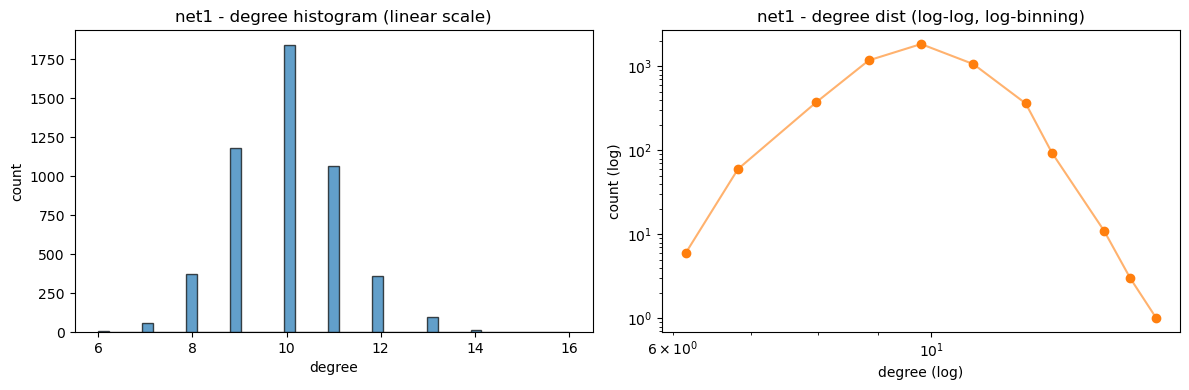

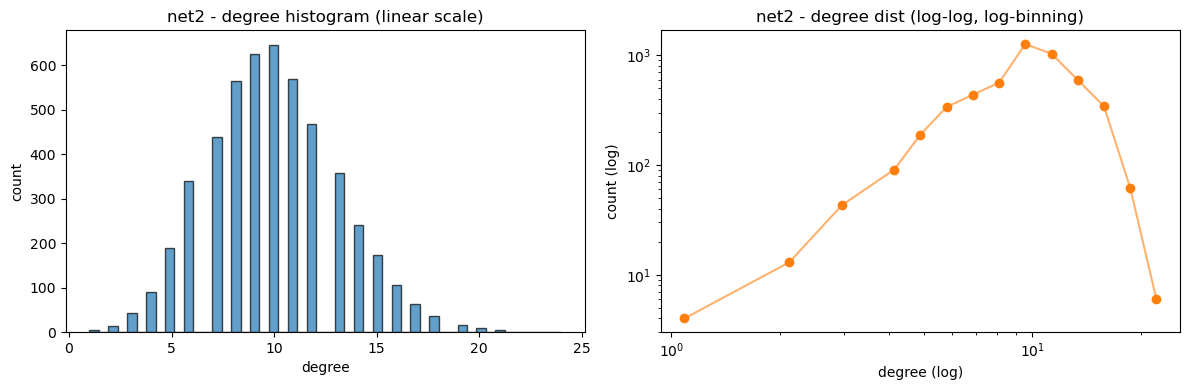

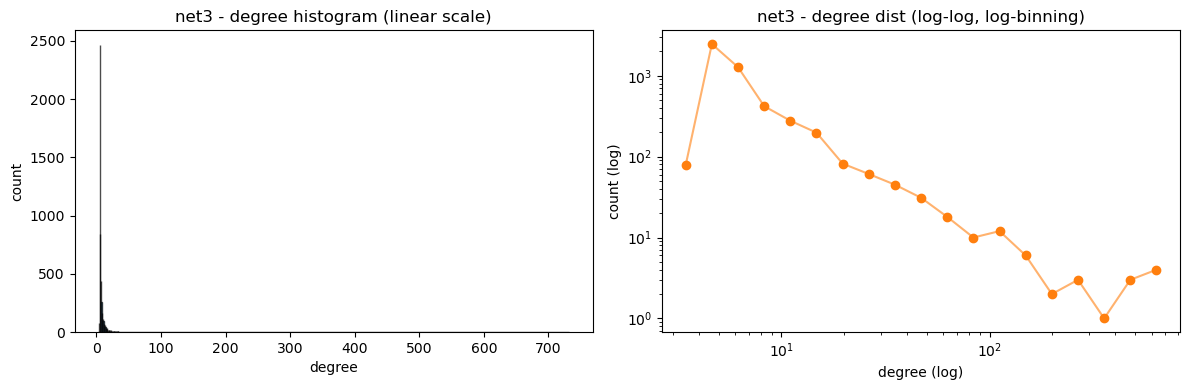

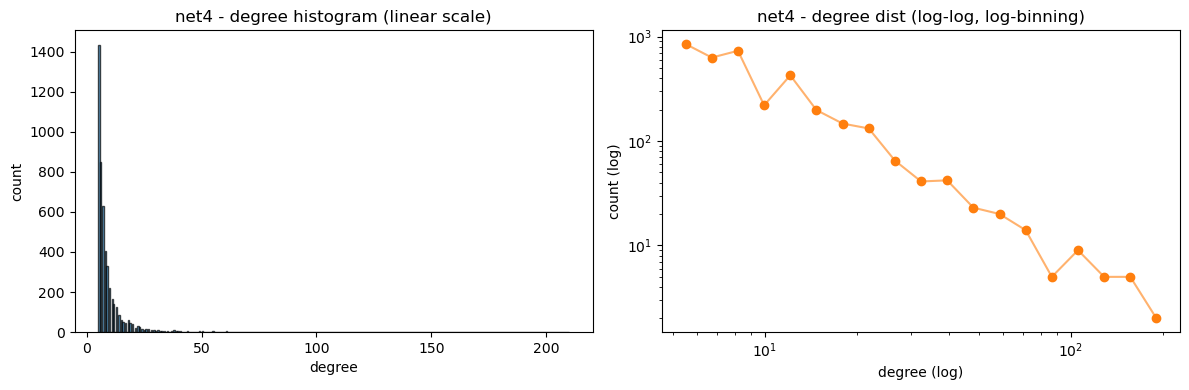

net1: nodes=5000, edges=25000, deg_min=6, deg_max=16, deg_avg=10.000, ratio=2.7, recommended=linear histogram, alpha_est=2.7355416312917065, r2=0.10779972161828333
net2: nodes=5000, edges=24873, deg_min=1, deg_max=24, deg_avg=9.949, ratio=24.0, recommended=linear histogram, alpha_est=-0.9686485571790165, r2=0.19803214550379744
net3: nodes=5000, edges=23508, deg_min=3, deg_max=732, deg_avg=9.403, ratio=244.0, recommended=log-log (log-binning), alpha_est=1.2687607519759738, r2=0.8531911790022024
net4: nodes=5000, edges=24975, deg_min=5, deg_max=210, deg_avg=9.990, ratio=42.0, recommended=log-log (log-binning), alpha_est=1.6941800525564257, r2=0.9765239172439709


In [29]:
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt

targets = [('net1', net1), ('net2', net2), ('net3', net3), ('net4', net4)]

recommendations = {}

for name, G in targets:
    if G is None:
        print(f"{name}: not loaded")
        recommendations[name] = None
        continue

    degs = [d for _, d in G.degree()]
    if len(degs) == 0:
        print(f"{name}: no nodes")
        recommendations[name] = None
        continue

    deg_min = max(1, min(degs))  # ensure >=1 for log-binning
    deg_max = max(degs)
    ratio = deg_max / deg_min if deg_min > 0 else np.inf

    # Linear histogram
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].hist(degs, bins='auto', color='C0', edgecolor='k', alpha=0.7)
    axes[0].set_title(f"{name} - degree histogram (linear scale)")
    axes[0].set_xlabel("degree")
    axes[0].set_ylabel("count")

    # Log-log histogram with logarithmic binning
    nbins = 20
    bins = np.logspace(np.log10(deg_min), np.log10(max(deg_max, deg_min + 1)), nbins)
    counts, edges = np.histogram(degs, bins=bins)
    # compute bin centers as geometric mean
    centers = np.sqrt(edges[:-1] * edges[1:])

    # Plot on log-log
    ax = axes[1]
    nonzero = counts > 0
    ax.scatter(centers[nonzero], counts[nonzero], color='C1')
    ax.plot(centers[nonzero], counts[nonzero], linestyle='-', color='C1', alpha=0.6)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel("degree (log)")
    ax.set_ylabel("count (log)")
    ax.set_title(f"{name} - degree dist (log-log, log-binning)")

    plt.tight_layout()
    plt.show()

    # Try a simple power-law fit on the log-binned nonzero bins
    if nonzero.sum() >= 3:
        x = np.log10(centers[nonzero])
        y = np.log10(counts[nonzero])
        coeffs = np.polyfit(x, y, 1)
        slope, intercept = coeffs[0], coeffs[1]
        # compute R^2
        y_pred = np.polyval(coeffs, x)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - ss_res / ss_tot if ss_tot > 0 else 0.0
        alpha = -slope  # power-law p(k) ~ k^{-alpha}
    else:
        slope = intercept = r2 = np.nan
        alpha = np.nan

    # Heuristic recommendation: use log-log if heavy tail (ratio large) and fit is decent
    use_log = (ratio >= 50 and not np.isnan(r2) and r2 >= 0.7) or (r2 >= 0.85)
    recommended = "log-log (log-binning)" if use_log else "linear histogram"

    recommendations[name] = {
        "nodes": G.number_of_nodes(),
        "edges": G.number_of_edges(),
        "deg_min": min(degs),
        "deg_max": max(degs),
        "deg_avg": sum(degs) / len(degs),
        "ratio_max_min": ratio,
        "power_law_alpha_est": float(alpha) if not np.isnan(alpha) else None,
        "power_law_r2": float(r2) if not np.isnan(r2) else None,
        "recommended_representation": recommended
    }

# Print concise summary
for name, rec in recommendations.items():
    if rec is None:
        continue
    print(f"{name}: nodes={rec['nodes']}, edges={rec['edges']}, "
          f"deg_min={rec['deg_min']}, deg_max={rec['deg_max']}, deg_avg={rec['deg_avg']:.3f}, "
          f"ratio={rec['ratio_max_min']:.1f}, recommended={rec['recommended_representation']}, "
          f"alpha_est={rec['power_law_alpha_est']}, r2={rec['power_law_r2']}")

### Microscopic structure

In [30]:
import math
import numpy as _np

# Analyze microscopic structure: top-5 nodes by betweenness, degree, eigenvector centralities
# Uses existing variables/networks (net1..net4) and previously imported numpy/matplotlib/networkx.

targets = [('net1', net1), ('net2', net2), ('net3', net3), ('net4', net4)]
top_k = 5

def _top_k_from_dict(d, k=5):
	items = sorted(d.items(), key=lambda kv: kv[1], reverse=True)
	return items[:k]

for name, G in targets:
	print(f"\n{name}:")
	if G is None:
		print("  not loaded")
		continue
	n = G.number_of_nodes()
	print(f"  nodes={n}, edges={G.number_of_edges()}")

	# Degree (raw)
	deg_dict = dict(G.degree())
	top_deg = _top_k_from_dict(deg_dict, top_k)

	# Degree centrality (normalized) -- gives comparable scale with others
	degc = nx.degree_centrality(G)
	# Betweenness centrality (exact for small graphs, approximate for large)
	if n > 2000:
		k = min(500, max(50, int(0.01 * n)))  # sample size for approximation
		print(f"  computing approximate betweenness (k={k}) ...")
		bet = nx.betweenness_centrality(G, k=k, seed=42, normalized=True)
	else:
		print("  computing exact betweenness ...")
		bet = nx.betweenness_centrality(G, normalized=True)

	top_bet = _top_k_from_dict(bet, top_k)

	# Eigenvector centrality: compute on largest connected component then project back
	if nx.is_connected(G):
		comp_for_eig = G
	else:
		largest_cc = max(nx.connected_components(G), key=len)
		comp_for_eig = G.subgraph(largest_cc)
		print(f"  graph disconnected: eigenvector computed on largest CC (size={comp_for_eig.number_of_nodes()})")

	try:
		# try power method (may be faster/robust)
		eig_c = nx.eigenvector_centrality(comp_for_eig, max_iter=1000, tol=1e-06)
		# Map back to full graph: nodes outside CC get 0
		eig = {nnode: eig_c.get(nnode, 0.0) for nnode in G.nodes()}
		top_eig = _top_k_from_dict(eig, top_k)
	except Exception as e:
		print(f"  eigenvector centrality failed: {e}")
		eig = {nnode: 0.0 for nnode in G.nodes()}
		top_eig = []

	# Print top-5 lists
	print("  Top-5 by degree (node, degree):")
	for node, val in top_deg:
		print(f"    {node}: {val}")

	print("  Top-5 by betweenness (node, centrality):")
	for node, val in top_bet:
		print(f"    {node}: {val:.6f}")

	print("  Top-5 by eigenvector (node, centrality):")
	for node, val in top_eig:
		print(f"    {node}: {val:.6f}")

	# Compare overlaps and simple rank correlations
	deg_top_nodes = {n for n, _ in top_deg}
	bet_top_nodes = {n for n, _ in top_bet}
	eig_top_nodes = {n for n, _ in top_eig}

	def jaccard(a, b):
		if not a and not b:
			return 1.0
		inter = len(a & b)
		uni = len(a | b)
		return inter / uni if uni > 0 else 0.0

	print("  Overlaps (counts):")
	print(f"    degree ∩ betweenness: {len(deg_top_nodes & bet_top_nodes)} (Jaccard={jaccard(deg_top_nodes, bet_top_nodes):.2f})")
	print(f"    degree ∩ eigenvector: {len(deg_top_nodes & eig_top_nodes)} (Jaccard={jaccard(deg_top_nodes, eig_top_nodes):.2f})")
	print(f"    betweenness ∩ eigenvector: {len(bet_top_nodes & eig_top_nodes)} (Jaccard={jaccard(bet_top_nodes, eig_top_nodes):.2f})")

	# Simple rank correlation (Spearman-like) using integer ranks (ties handled arbitrarily)
	def _ranks_from_scores(score_dict):
		# higher score -> better rank (0 best). Return array aligned to nodes list.
		items = sorted(score_dict.items(), key=lambda kv: kv[1], reverse=True)
		ranks = {}
		for i, (node, _) in enumerate(items):
			ranks[node] = i
		return ranks

	ranks_deg = _ranks_from_scores(degc)
	ranks_bet = _ranks_from_scores(bet)
	ranks_eig = _ranks_from_scores(eig)

	# build aligned arrays
	nodes_list = list(G.nodes())
	arr_deg = _np.array([ranks_deg[n] for n in nodes_list], dtype=float)
	arr_bet = _np.array([ranks_bet[n] for n in nodes_list], dtype=float)
	arr_eig = _np.array([ranks_eig[n] for n in nodes_list], dtype=float)

	def rank_corr(a, b):
		if a.size == 0 or b.size == 0:
			return float('nan')
		# convert to zero-mean and compute Pearson
		a_mean = a.mean()
		b_mean = b.mean()
		denom = (a - a_mean).std() * (b - b_mean).std()
		if denom == 0:
			return float('nan')
		return float(_np.corrcoef(a, b)[0, 1])

	print("  Rank-correlation (approx Spearman via integer ranks):")
	print(f"    degree vs betweenness: {rank_corr(arr_deg, arr_bet):.3f}")
	print(f"    degree vs eigenvector: {rank_corr(arr_deg, arr_eig):.3f}")
	print(f"    betweenness vs eigenvector: {rank_corr(arr_bet, arr_eig):.3f}")



net1:
  nodes=5000, edges=25000
  computing approximate betweenness (k=50) ...
  Top-5 by degree (node, degree):
    1693: 16
    651: 15
    1579: 15
    4891: 15
    41: 14
  Top-5 by betweenness (node, centrality):
    1795: 0.010831
    4469: 0.008214
    1808: 0.007760
    4463: 0.007721
    3604: 0.007424
  Top-5 by eigenvector (node, centrality):
    651: 0.028634
    1937: 0.026475
    4526: 0.025633
    4398: 0.025253
    1939: 0.025169
  Overlaps (counts):
    degree ∩ betweenness: 0 (Jaccard=0.00)
    degree ∩ eigenvector: 1 (Jaccard=0.11)
    betweenness ∩ eigenvector: 0 (Jaccard=0.00)
  Rank-correlation (approx Spearman via integer ranks):
    degree vs betweenness: 0.445
    degree vs eigenvector: 0.687
    betweenness vs eigenvector: 0.371

net2:
  nodes=5000, edges=24873
  computing approximate betweenness (k=50) ...
  Top-5 by degree (node, degree):
    1581: 24
    787: 23
    52: 21
    1990: 21
    2372: 21
  Top-5 by betweenness (node, centrality):
    4669: 0.008

## Part 2. Models

In [ ]:
import networkx as nx
import numpy as np
from collections import defaultdict
import math

def infer_model_robust(G, rec=None):
    """
    Robust classifier to infer the generation model directly from a NetworkX graph (G), 
    using structural properties like C(k) decay, relative clustering, and heterogeneity.
    
    The function now returns the predicted model name and a dictionary of 
    estimated creation parameters.

    Inputs:
      - G: A networkx.Graph object (the full network data).
      - rec: optional dict from degree-distribution analysis with keys
             'ratio_max_min', 'power_law_r2', 'recommended_representation',
             and 'power_law_alpha_est'.
             
    Returns: tuple (model_name: str, params: dict).
    """
    if not isinstance(G, nx.Graph):
        return ('Error: Input G must be a networkx.Graph object.', {})

    # --- 1. Core Structural Metric Calculation ---
    n = G.number_of_nodes()
    degrees = dict(G.degree())
    deg_avg = sum(degrees.values()) / n
    avg_clust = nx.average_clustering(G)
    
    # Calculate Average Path Length (L) for connected components
    try:
        avg_path = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        # If disconnected, L is very large (treat as large path length)
        avg_path = n 

    # ER Baseline: Expected clustering for a random graph with the same N and <k>
    expected_clust_er = deg_avg / max(1, n - 1)
    
    # Extract degree analysis metrics
    r2 = rec.get('power_law_r2', 0.0) if rec else 0.0
    recommended = rec.get('recommended_representation', '') if rec else ''
    alpha = rec.get('power_law_alpha_est', None) if rec else None
    
    # Calculate degree range ratio if not provided
    ratio = rec.get('ratio_max_min', None) if rec else None
    deg_range_ratio = ratio
    if deg_range_ratio is None and deg_avg and deg_avg > 0:
        deg_range_ratio = max(degrees.values()) / max(1.0, deg_avg)


    # --- 2. Parameter Estimation (Pre-calculation) ---

    # ER Parameter (p): Estimated using p = <k> / (N - 1)
    p_er_est = expected_clust_er 

    # BA Parameter (m): Estimated using m = <k> / 2 (edges added by each new node)
    m_ba_est = round(deg_avg / 2)
    m_ba_est = max(1, m_ba_est) 

    # WS Parameters (k, beta)
    # k is the initial mean degree of the lattice, k is approx <k>
    k_ws_est = round(deg_avg)
    k_ws_est = max(4, k_ws_est) 

    # Theoretical max clustering for a ring lattice (beta=0) with k_ws_est
    c_max_ws = 3 * (k_ws_est - 2) / (4 * (k_ws_est - 1)) if k_ws_est > 2 else 0
    
    # Estimate beta (rewiring probability) based on observed vs max clustering
    if c_max_ws > 0:
        # Heuristic estimation relating C_obs/C_max to beta
        beta_raw = 1.0 - (avg_clust / c_max_ws)
        beta_ws_est = max(0.001, min(0.999, beta_raw**2))
    else:
        beta_ws_est = 0.5


    # --- 3. Scale-Free Check (Heterogeneity) ---
    # R2 >= 0.75 and log-log plot confirm power-law distribution.
    is_scale_free = (r2 >= 0.75) and (recommended == 'log-log (log-binning)')
    
    if is_scale_free:
        # CM Parameter: The power-law exponent (gamma)
        gamma_cm_est = alpha if alpha is not None else 'N/A'
        
        # Calculate C(k) trend: Compare clustering of low-degree nodes vs high-degree nodes.
        degrees_list = sorted(degrees.values())
        high_degree_threshold = degrees_list[int(n * 0.9)] 
        
        clust_k = nx.clustering(G)
        c_hubs = []
        c_non_hubs = []
        
        for node, degree in degrees.items():
            if degree >= high_degree_threshold:
                c_hubs.append(clust_k[node])
            else:
                c_non_hubs.append(clust_k[node])
        
        avg_c_hubs = np.mean(c_hubs) if c_hubs else 0
        avg_c_non_hubs = np.mean(c_non_hubs) if c_non_hubs else 0
        
        # CRITERION FOR BA: Decaying C(k). Hubs must be clustered less than 75% of non-hubs 
        # (This indicates the structural lack of local triangles characteristic of BA).
        if (avg_c_non_hubs > 0.01) and (avg_c_hubs / avg_c_non_hubs < 0.75): 
            return 'Barabasi-Albert (BA)', {'m_edges_per_step': m_ba_est, 'N_nodes': n, 'alpha_exponent': gamma_cm_est}
        else:
            # High or non-decaying clustering: Configuration Model (CM)
            return 'Configuration Model (CM)', {'gamma_exponent': gamma_cm_est, 'N_nodes': n}

    # --- 4. Homogeneous Check (ER vs. WS) ---
    # High Clustering Test: Must be > 50x ER baseline (or significant absolute value)
    is_high_clustering = (avg_clust > 50 * expected_clust_er)
    # Short Path Length Test: L must be short (e.g., L < sqrt(N) proxy)
    is_short_path = avg_path < np.sqrt(n) 
    
    if is_high_clustering and is_short_path:
        return 'Watts-Strogatz (WS)', {'k_mean_degree': k_ws_est, 'beta_rewiring_prob': round(beta_ws_est, 3), 'N_nodes': n}
    
    # If not Scale-Free and not Watts-Strogatz, it defaults to ER (low clustering, short path).
    if is_short_path and (avg_clust < 5 * expected_clust_er):
        return 'Erdos-Renyi (ER)', {'p_edge_probability': round(p_er_est, 5), 'N_nodes': n}

    # --- 5. Fallback ---
    return 'Unknown / ambiguous', {'avg_degree': deg_avg, 'avg_clustering': avg_clust}

# Note: The test loop relies on the 'results' and 'recommendations' dicts which are 
# not defined in this file. To run this, you would load G and define rec.



#### Testing the infer model functions (change number to test which is better)

In [32]:
# Run infer_model_robust on net1..net4 using existing `recommendations`
results_pred = {}
for name in ['net1', 'net2', 'net3', 'net4']:
    G = globals().get(name)
    rec = recommendations.get(name) if 'recommendations' in globals() else None

    if G is None:
        print(f"{name}: not loaded")
        results_pred[name] = None
        continue

    try:
        pred = infer_model_robust(G, rec)
    except Exception as e:
        pred = f"Error: {e}"
    print(f"{name}: predicted model -> {pred}")
    results_pred[name] = pred

results_pred

net1: predicted model -> ('Watts-Strogatz (WS)', {'k_mean_degree': 10, 'beta_rewiring_prob': 0.144, 'N_nodes': 5000})
net2: predicted model -> ('Erdos-Renyi (ER)', {'p_edge_probability': 0.00199, 'N_nodes': 5000})
net3: predicted model -> ('Configuration Model (CM)', {'gamma_exponent': 1.2687607519759738, 'N_nodes': 5000})
net4: predicted model -> ('Barabasi-Albert (BA)', {'m_edges_per_step': 5, 'N_nodes': 5000, 'alpha_exponent': 1.6941800525564257})


{'net1': ('Watts-Strogatz (WS)',
  {'k_mean_degree': 10, 'beta_rewiring_prob': 0.144, 'N_nodes': 5000}),
 'net2': ('Erdos-Renyi (ER)',
  {'p_edge_probability': 0.00199, 'N_nodes': 5000}),
 'net3': ('Configuration Model (CM)',
  {'gamma_exponent': 1.2687607519759738, 'N_nodes': 5000}),
 'net4': ('Barabasi-Albert (BA)',
  {'m_edges_per_step': 5,
   'N_nodes': 5000,
   'alpha_exponent': 1.6941800525564257})}

### Net5 analysis

To round off the activity, the students should analyze the network net5. This network is generated by a model which has not been explained in our lectures. The students should visualize the network (setting the positions of the nodes from the file ‘positions.txt’) and comment the most prominent features of the network. Is the network connected? Is it scale-free? Is the largest connected component a small-world network? From the visualization of the network, the students should propose an algorithm to generate the network. Hint: The algorithm starts by distributing the nodes randomly across space.

#### Basic analisis of net5 structure

net5: nodes=200, edges=465
degree: min=1, max=10, avg=4.650
connected: False, n_components=7, largest_cc_size=125
avg_clustering=0.610675, assortativity=0.550181
avg_path_length(lcc)=13.130967741935484, diameter(lcc)=35


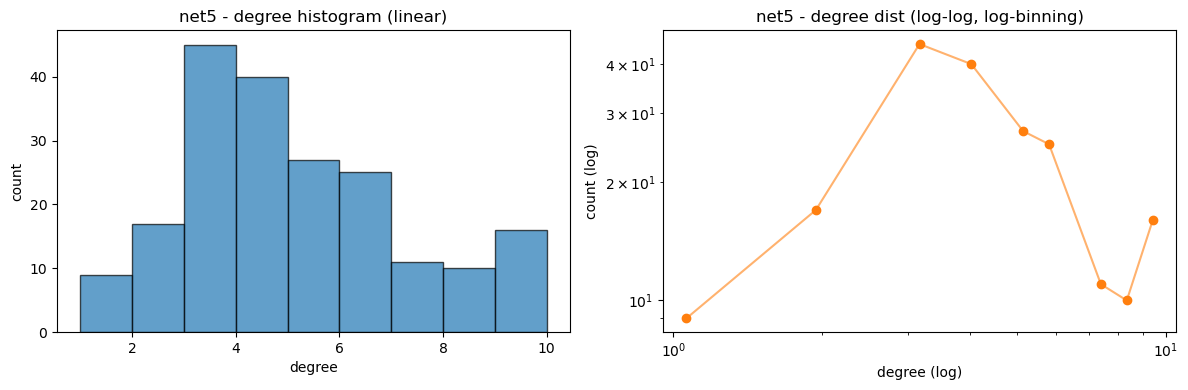

power-law fit (log-binned): slope=0.0262, alpha≈-0.0262, r2=0.0010

Top-5 by degree:
  18: 10
  33: 10
  37: 10
  126: 10
  150: 10

Top-5 by betweenness:
  177: 0.195460
  129: 0.193290
  78: 0.192630
  84: 0.192630
  104: 0.192325

Top-5 by eigenvector (computed on LCC):
  18: 0.327028
  33: 0.327028
  37: 0.325614
  170: 0.318899
  154: 0.285155

Top-5 overlaps (counts, Jaccard):
  degree ∩ betweenness: 0 (J=0.00)
  degree ∩ eigenvector: 3 (J=0.43)
  betweenness ∩ eigenvector: 0 (J=0.00)


In [33]:
# Basic analysis of net5 (cell 17)
G = net5

if G is None:
    print("net5 not loaded.")
else:
    n = G.number_of_nodes()
    m = G.number_of_edges()
    degs = [d for _, d in G.degree()]
    deg_min = min(degs) if degs else 0
    deg_max = max(degs) if degs else 0
    deg_avg = sum(degs) / len(degs) if degs else 0.0

    print(f"net5: nodes={n}, edges={m}")
    print(f"degree: min={deg_min}, max={deg_max}, avg={deg_avg:.3f}")

    # connectivity / components
    is_conn = nx.is_connected(G)
    comps = list(nx.connected_components(G))
    n_comp = len(comps)
    largest_cc = max(comps, key=len) if comps else set()
    size_lcc = len(largest_cc)
    print(f"connected: {is_conn}, n_components={n_comp}, largest_cc_size={size_lcc}")

    # clustering, assortativity
    avg_clustering_net5 = nx.average_clustering(G)
    assort_net5 = nx.degree_assortativity_coefficient(G)
    print(f"avg_clustering={avg_clustering_net5:.6f}, assortativity={assort_net5:.6f}")

    # average path / diameter on largest CC
    if size_lcc > 0:
        H = G.subgraph(largest_cc)
        try:
            apl = nx.average_shortest_path_length(H)
            diam = nx.diameter(H)
        except Exception:
            apl = float('nan')
            diam = float('nan')
    else:
        apl = float('nan')
        diam = float('nan')
    print(f"avg_path_length(lcc)={apl}, diameter(lcc)={diam}")

    # degree distribution plots (linear + log-log with log-binning)
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].hist(degs, bins='auto', color='C0', edgecolor='k', alpha=0.7)
    axes[0].set_title("net5 - degree histogram (linear)")
    axes[0].set_xlabel("degree")
    axes[0].set_ylabel("count")

    # log-binning
    deg_min_pos = max(1, deg_min)
    nbins = 20
    bins = np.logspace(np.log10(deg_min_pos), np.log10(max(deg_max, deg_min_pos + 1)), nbins)
    counts, edges = np.histogram(degs, bins=bins)
    centers = np.sqrt(edges[:-1] * edges[1:])
    nonzero = counts > 0
    ax = axes[1]
    ax.scatter(centers[nonzero], counts[nonzero], color='C1')
    ax.plot(centers[nonzero], counts[nonzero], color='C1', alpha=0.6)
    ax.set_xscale('log'); ax.set_yscale('log')
    ax.set_title("net5 - degree dist (log-log, log-binning)")
    ax.set_xlabel("degree (log)"); ax.set_ylabel("count (log)")
    plt.tight_layout()
    plt.show()

    # simple power-law fit on log-binned nonzero bins
    if nonzero.sum() >= 3:
        x = np.log10(centers[nonzero])
        y = np.log10(counts[nonzero])
        coeffs = np.polyfit(x, y, 1)
        slope, intercept = coeffs[0], coeffs[1]
        y_pred = np.polyval(coeffs, x)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - ss_res / ss_tot if ss_tot > 0 else 0.0
        alpha_est = -slope
        print(f"power-law fit (log-binned): slope={slope:.4f}, alpha≈{alpha_est:.4f}, r2={r2:.4f}")
    else:
        print("not enough nonzero bins for power-law fit")

    # top-5 central nodes by degree, betweenness, eigenvector
    top_k = 5
    deg_dict = dict(G.degree())
    top_deg = sorted(deg_dict.items(), key=lambda kv: kv[1], reverse=True)[:top_k]
    print("\nTop-5 by degree:")
    for node, val in top_deg:
        print(f"  {node}: {val}")

    # betweenness (approx if large)
    if n > 2000:
        k = min(500, max(50, int(0.01 * n)))
        bet = nx.betweenness_centrality(G, k=k, seed=42, normalized=True)
    else:
        bet = nx.betweenness_centrality(G, normalized=True)
    top_bet = sorted(bet.items(), key=lambda kv: kv[1], reverse=True)[:top_k]
    print("\nTop-5 by betweenness:")
    for node, val in top_bet:
        print(f"  {node}: {val:.6f}")

    # eigenvector on largest CC, map back
    if size_lcc > 0:
        try:
            eig_c = nx.eigenvector_centrality(H, max_iter=1000, tol=1e-06)
            eig_full = {nnode: eig_c.get(nnode, 0.0) for nnode in G.nodes()}
            top_eig = sorted(eig_full.items(), key=lambda kv: kv[1], reverse=True)[:top_k]
            print("\nTop-5 by eigenvector (computed on LCC):")
            for node, val in top_eig:
                print(f"  {node}: {val:.6f}")
        except Exception as e:
            print(f"eigenvector centrality failed: {e}")

    # simple overlap counts between top lists
    deg_top_nodes = {n for n, _ in top_deg}
    bet_top_nodes = {n for n, _ in top_bet}
    eig_top_nodes = {n for n, _ in top_eig} if size_lcc > 0 else set()

    def jaccard(a, b):
        if not a and not b:
            return 1.0
        inter = len(a & b)
        uni = len(a | b)
        return inter / uni if uni > 0 else 0.0

    print("\nTop-5 overlaps (counts, Jaccard):")
    print(f"  degree ∩ betweenness: {len(deg_top_nodes & bet_top_nodes)} (J={jaccard(deg_top_nodes, bet_top_nodes):.2f})")
    print(f"  degree ∩ eigenvector: {len(deg_top_nodes & eig_top_nodes)} (J={jaccard(deg_top_nodes, eig_top_nodes):.2f})")
    print(f"  betweenness ∩ eigenvector: {len(bet_top_nodes & eig_top_nodes)} (J={jaccard(bet_top_nodes, eig_top_nodes):.2f})")

##### Using the model inference functions to check which model fits better

In [34]:
# Use existing infer_model_robust on net5 (cell 18)
rec5 = recommendations.get('net5') if 'recommendations' in globals() else None

try:
    pred_net5 = infer_model_robust(net5, rec5)
except Exception as e:
    pred_net5 = ('Error', str(e))

print("net5: predicted model ->", pred_net5)

# store/update in results_pred dict if available
if 'results_pred' in globals() and isinstance(results_pred, dict):
    results_pred['net5'] = pred_net5
else:
    results_pred = {'net5': pred_net5}

net5: predicted model -> ('Unknown / ambiguous', {'avg_degree': 4.65, 'avg_clustering': 0.6106746031746032})


#### Getting positions and linking to graph

In [36]:
from pathlib import Path
import networkx as _nx

# try a few candidate filenames
candidates = [Path("positions_net5.txt"), Path("positions.txt"), Path("positions-net5.txt")]
pos_file = next((p for p in candidates if p.exists()), None)

if pos_file is None:
    raise FileNotFoundError("positions file not found. Looked for: " + ", ".join(str(p) for p in candidates))

lines = [ln.strip() for ln in pos_file.read_text().splitlines() if ln.strip() and not ln.strip().startswith("#")]

pos_net5 = {}
coords_only = []

for ln in lines:
    # normalize separators (commas/tabs) and split
    ln_clean = ln.replace(",", " ").replace("\t", " ").strip()
    toks = ln_clean.split()
    if not toks:
        continue

    # skip common header lines (e.g., "Node x y" or "id x y")
    if toks[0].lower() in ("node", "id") or (len(toks) >= 2 and toks[1].lower() in ("x", "y")):
        continue

    # lines with at least 3 tokens: assume (node, x, y) where x,y are last two tokens
    if len(toks) >= 3:
        node = toks[0]
        try:
            x = float(toks[-2])
            y = float(toks[-1])
        except Exception:
            # malformed numeric fields -> skip line
            continue
        pos_net5[str(node)] = (x, y)

    # lines with exactly 2 tokens: coordinate-only or malformed
    elif len(toks) == 2:
        try:
            x = float(toks[0]); y = float(toks[1])
            coords_only.append((x, y))
        except Exception:
            # skip malformed line
            continue

# If file only contained coordinates (no node ids), map them in graph node order
if not pos_net5 and coords_only:
    # prefer net5 variable if available, else G
    graph_obj = globals().get("net5") or globals().get("G")
    if graph_obj is None:
        raise RuntimeError("No graph (net5 or G) found to assign positional coordinates by order.")
    nodes = list(graph_obj.nodes())
    if len(coords_only) != len(nodes):
        raise RuntimeError(f"Number of coordinate lines ({len(coords_only)}) does not match number of nodes ({len(nodes)}).")
    for node, coord in zip(nodes, coords_only):
        pos_net5[str(node)] = coord

# attach positions as node attribute 'pos' to net5 (if present)
graph_obj = globals().get("net5") or globals().get("G")
if graph_obj is not None:
    # only set attributes for nodes we have positions for
    matched = 0
    for node_str, coord in pos_net5.items():
        if node_str in graph_obj.nodes():
            _nx.set_node_attributes(graph_obj, {node_str: coord}, name="pos")
            matched += 1
        else:
            # try numeric node id match if nodes are ints
            try:
                node_int = int(node_str)
                if node_int in graph_obj.nodes():
                    _nx.set_node_attributes(graph_obj, {node_int: coord}, name="pos")
                    matched += 1
            except Exception:
                pass
    print(f"Loaded positions from {pos_file} -> total entries: {len(pos_net5)}, matched to graph nodes: {matched}")
else:
    print(f"Loaded positions from {pos_file} -> total entries: {len(pos_net5)} (graph not found to attach)")

# expose pos_net5 for later use
pos_net5

Loaded positions from positions_net5.txt -> total entries: 200, matched to graph nodes: 200


{'0': (0.2109, 0.0554),
 '1': (0.0517, 0.2001),
 '2': (0.2584, 0.3119),
 '3': (0.3261, 0.5616),
 '4': (0.0469, 0.6134),
 '5': (0.6192, 0.9149),
 '6': (0.1214, 0.5456),
 '7': (0.9977, 0.1578),
 '8': (0.8031, 0.4655),
 '9': (0.4658, 0.972),
 '10': (0.7223, 0.2398),
 '11': (0.0032, 0.8871),
 '12': (0.971, 0.3345),
 '13': (0.8479, 0.22),
 '14': (0.1688, 0.7846),
 '15': (0.9125, 0.1705),
 '16': (0.2466, 0.8393),
 '17': (0.0476, 0.5901),
 '18': (0.1549, 0.0881),
 '19': (0.9962, 0.8715),
 '20': (0.1605, 0.4882),
 '21': (0.6054, 0.077),
 '22': (0.2986, 0.8061),
 '23': (0.1719, 0.288),
 '24': (0.7388, 0.2822),
 '25': (0.729, 0.2072),
 '26': (0.6945, 0.9651),
 '27': (0.5983, 0.1881),
 '28': (0.574, 0.7012),
 '29': (0.2521, 0.2278),
 '30': (0.9185, 0.9057),
 '31': (0.7415, 0.5012),
 '32': (0.8253, 0.1067),
 '33': (0.1712, 0.0989),
 '34': (0.9911, 0.2881),
 '35': (0.7967, 0.9522),
 '36': (0.997, 0.3993),
 '37': (0.1086, 0.1365),
 '38': (0.1929, 0.9144),
 '39': (0.2333, 0.322),
 '40': (0.3711, 0.62

##### Linking nodes with positions and visualizing

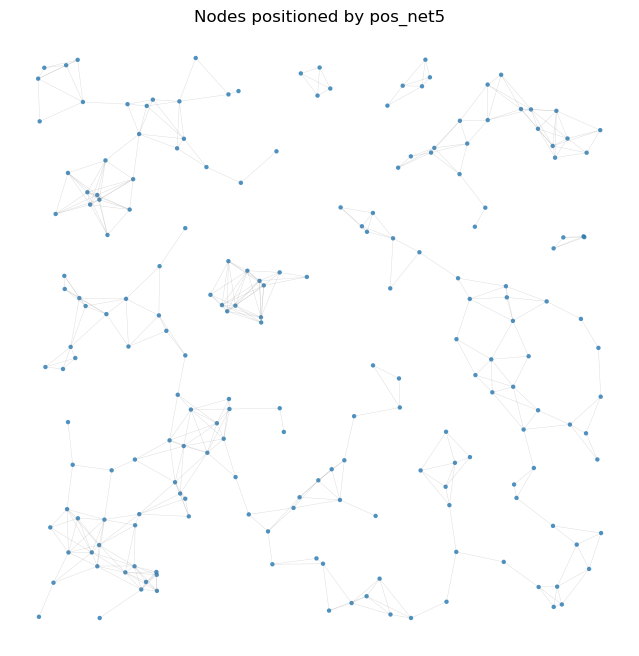

In [38]:
# Plot nodes using pos_net5 coordinates (scatter). If net5 is available and positions cover nodes,
# optionally overlay edges for nodes that have coordinates.
graph = globals().get('net5') or globals().get('G')
pos = globals().get('pos_net5') or globals().get('positions')

if pos is None:
    raise RuntimeError("pos_net5 (or positions) not found in the notebook globals.")

# Extract coordinates
coords = list(pos.values())
xs = [c[0] for c in coords]
ys = [c[1] for c in coords]

plt.figure(figsize=(8, 8))
plt.scatter(xs, ys, s=10, c='C0', alpha=0.8, edgecolors='none')

# If a graph is present, draw edges for node pairs where both endpoints have positions
if graph is not None:
    # build a mapping from graph node -> position (try matching both str and int keys)
    node_pos = {}
    for n in graph.nodes():
        if n in pos:
            node_pos[n] = pos[n]
        else:
            try:
                nstr = str(n)
                if nstr in pos:
                    node_pos[n] = pos[nstr]
                else:
                    nint = int(nstr)
                    if nint in pos:
                        node_pos[n] = pos[nint]
            except Exception:
                pass

    # draw edges for which both endpoints have coordinates
    edge_coords = []
    for u, v in graph.edges():
        if u in node_pos and v in node_pos:
            edge_coords.append((node_pos[u], node_pos[v]))

    if edge_coords:
        for (x1, y1), (x2, y2) in edge_coords:
            plt.plot([x1, x2], [y1, y2], color='gray', linewidth=0.3, alpha=0.3)

plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.title("Nodes positioned by pos_net5")
plt.show()

In [45]:
import math
import numpy as _np

# Annotate net5 edges with Euclidean distance computed from node positions (x,y).
# Uses existing globals: net5 (or G) and pos_net5 / pos / positions.

G = globals().get('net5') or globals().get('G')
pos = globals().get('pos_net5') or globals().get('pos') or globals().get('positions')

if G is None:
    raise RuntimeError("Graph 'net5' (or 'G') not found in globals.")
if pos is None:
    raise RuntimeError("Position mapping (pos_net5 / pos / positions) not found in globals.")

def _get_coord(node):
    # try direct match, then str(node), then int->str fallback
    if node in pos:
        return pos[node]
    s = str(node)
    if s in pos:
        return pos[s]
    try:
        si = str(int(s))
        if si in pos:
            return pos[si]
    except Exception:
        pass
    return None

annotated = 0
missing = 0
dists = []

if G.is_multigraph():
    for u, v, k, data in G.edges(keys=True, data=True):
        cu = _get_coord(u); cv = _get_coord(v)
        if cu is None or cv is None:
            data['pos_dist'] = None
            missing += 1
        else:
            dist = math.hypot(cu[0] - cv[0], cu[1] - cv[1])
            data['pos_dist'] = float(dist)
            dists.append(dist)
            annotated += 1
else:
    for u, v, data in G.edges(data=True):
        cu = _get_coord(u); cv = _get_coord(v)
        if cu is None or cv is None:
            data['pos_dist'] = None
            missing += 1
        else:
            dist = math.hypot(cu[0] - cv[0], cu[1] - cv[1])
            data['pos_dist'] = float(dist)
            dists.append(dist)
            annotated += 1

total_edges = G.number_of_edges()
print(f"Annotated distances for {annotated}/{total_edges} edges. Missing positions for {missing} edges.")

# expose some basic stats if any distances computed
if dists:
    arr = _np.array(dists)
    print(f"dist stats — min: {arr.min():.6f}, mean: {arr.mean():.6f}, max: {arr.max():.6f}, std: {arr.std():.6f}")

Annotated distances for 465/465 edges. Missing positions for 0 edges.
dist stats — min: 0.002052, mean: 0.059126, max: 0.089979, std: 0.021205


#### Further analisis of edge euclidean distance (finding the distance threshold for edge creation)

In [42]:
# Find smallest distance among positioned node pairs that are NOT edges.
# Relies on existing globals created in later cells: dists (np.ndarray), is_edge (array of 0/1), pairs (list of (u,v)),
# and pos / pos_net5 (node -> (x,y)). Do not re-run heavy preprocessing cells before this one.

if 'dists' not in globals() or 'is_edge' not in globals() or 'pairs' not in globals():
    raise RuntimeError("Required variables not found: ensure the pairwise-distance cell has been executed (dists, is_edge, pairs).")

# Mask for non-edge pairs (0 => no edge)
mask_nonedge = (is_edge == 0)
if mask_nonedge.sum() == 0:
    print("No non-edge pairs among the positioned node pairs (every pair is an edge).")
else:
    # distances for non-edge pairs
    d_non = dists[mask_nonedge]
    # index into the d_non array of the minimum
    min_idx_local = int(d_non.argmin())
    min_dist = float(d_non[min_idx_local])

    # map to global index in dists/pairs
    non_indices = np.nonzero(mask_nonedge)[0]
    global_idx = int(non_indices[min_idx_local])
    u, v = pairs[global_idx]

    # try to fetch coordinates from available position dicts
    pos_map = globals().get('pos_net5') or globals().get('pos') or globals().get('positions') or {}
    coord_u = pos_map.get(u) or pos_map.get(str(u))
    coord_v = pos_map.get(v) or pos_map.get(str(v))

    print(f"Smallest distance between a non-edge pair: {min_dist:.6f}")
    print(f"Node pair: {u}, {v}")
    if coord_u is not None and coord_v is not None:
        print(f"Coordinates: {coord_u} , {coord_v}")
    else:
        print("Coordinates not available in pos mapping for one or both nodes.")

    # also report a few closest non-edge pairs in case of ties or interest
    # find up to 5 smallest non-edge pairs
    k = min(10, d_non.size)
    order_local = np.argsort(d_non)[:k]
    print("\nTop closest non-edge pairs (distance, u, v):")
    for i in order_local:
        gi = int(non_indices[int(i)])
        uu, vv = pairs[gi]
        print(f"  {float(d_non[int(i)]):.6f}  {uu}  {vv}")

Smallest distance between a non-edge pair: 0.090304
Node pair: 70, 194
Coordinates: (0.3002, 0.3) , (0.2611, 0.2186)

Top closest non-edge pairs (distance, u, v):
  0.090304  70  194
  0.090323  117  141
  0.090438  126  173
  0.090499  5  26
  0.090530  85  147
  0.090619  62  170
  0.090637  154  165
  0.090722  72  94
  0.090750  95  102
  0.090979  48  62


In [44]:
# Produce an ordered list (descending) of connected node pairs by Euclidean distance.
# Uses existing globals when available: pairs, dists, is_edge, pos, net5/G.
# Result: edges_by_dist (list of tuples (distance, u, v)), printed top_k entries.

top_k = 5  # change if you want more/fewer entries

# prefer precomputed pairwise arrays if present
if all(name in globals() for name in ("pairs", "dists", "is_edge")):
    mask = (is_edge == 1)
    idxs = np.nonzero(mask)[0]
    edges_by_dist = [(float(dists[i]), pairs[i][0], pairs[i][1]) for i in idxs]
    edges_by_dist.sort(key=lambda t: t[0], reverse=True)
else:
    # fallback: compute distances for existing graph edges using position mapping
    G = globals().get("net5") or globals().get("G")
    pos_map = globals().get("pos_net5") or globals().get("pos") or globals().get("positions")
    if G is None or pos_map is None:
        raise RuntimeError("Need either (pairs,dists,is_edge) or both a graph (net5/G) and a position map (pos_net5/pos/positions).")

    def _coord(n):
        if n in pos_map:
            return pos_map[n]
        s = str(n)
        if s in pos_map:
            return pos_map[s]
        return None

    edges_by_dist = []
    for u, v in G.edges():
        cu = _coord(u); cv = _coord(v)
        if cu is None or cv is None:
            continue
        dist = math.hypot(cu[0] - cv[0], cu[1] - cv[1])
        edges_by_dist.append((float(dist), str(u), str(v)))
    edges_by_dist.sort(key=lambda t: t[0], reverse=True)

# Print top results
print(f"Total connected pairs considered: {len(edges_by_dist)}")
print(f"Top {min(top_k, len(edges_by_dist))} longest-edge pairs (distance, node_u, node_v, coord_u, coord_v):\n")
for i, (dist, u, v) in enumerate(edges_by_dist[:top_k], start=1):
    coord_u = (pos.get(u) or pos.get(str(u))) if 'pos' in globals() else None
    coord_v = (pos.get(v) or pos.get(str(v))) if 'pos' in globals() else None
    print(f"{i:2d}. {dist:.6f}  {u}  {v}  {coord_u}  {coord_v}")

# expose variable for later use
edges_by_dist

Total connected pairs considered: 465
Top 5 longest-edge pairs (distance, node_u, node_v, coord_u, coord_v):

 1. 0.089979  104  121  (0.7412, 0.1244)  (0.7239, 0.0361)
 2. 0.089741  2  23  (0.2584, 0.3119)  (0.1719, 0.288)
 3. 0.089705  44  78  (0.5051, 0.1034)  (0.4154, 0.1025)
 4. 0.089689  37  74  (0.1086, 0.1365)  (0.1796, 0.1913)
 5. 0.089410  87  167  (0.0005, 0.9627)  (0.0798, 0.9214)


[(0.08997877527506139, '104', '121'),
 (0.089741071979334, '2', '23'),
 (0.0897045149365404, '44', '78'),
 (0.08968857229324147, '37', '74'),
 (0.08941017839150081, '87', '167'),
 (0.08925922921468682, '144', '192'),
 (0.08915968820044179, '21', '115'),
 (0.08911099819887555, '120', '148'),
 (0.0891096515535775, '39', '77'),
 (0.08884081269326616, '49', '152'),
 (0.08882482761030273, '160', '193'),
 (0.08873353368372068, '19', '69'),
 (0.088511242223799, '35', '157'),
 (0.08849542361048957, '14', '106'),
 (0.08847310325743074, '50', '172'),
 (0.08843873585708922, '93', '110'),
 (0.08823831367382312, '1', '170'),
 (0.08823338370480865, '114', '171'),
 (0.0879889197569785, '144', '154'),
 (0.08789106894332327, '74', '76'),
 (0.08786017300233362, '58', '64'),
 (0.08784577394502255, '38', '172'),
 (0.08776616660194295, '107', '140'),
 (0.0876564315951773, '115', '158'),
 (0.08720825648985302, '112', '195'),
 (0.08711170989023227, '72', '133'),
 (0.0868498128955958, '70', '148'),
 (0.086755

##### Generate random geometrical graph with the suspected parameters

In [47]:
# Reconstruct a Random Geometric Graph (RGG) from the loaded positions (positions_net5.txt)
# Uses existing globals: pos_net5 / pos / positions and networkx/numpy already imported.

# Parameters (as estimated)
R = 0.0900  # connection radius
pos_map = globals().get('pos_net5') or globals().get('pos') or globals().get('positions')

if pos_map is None:
    raise RuntimeError("Position mapping (pos_net5 / pos / positions) not found in globals.")

# Keep node identifiers as they appear in the position file (strings or ints)
nodes = list(pos_map.keys())
coords = np.array([pos_map[n] for n in nodes], dtype=float)
n = len(nodes)

# Build RGG using vectorized distance computation (upper triangle)
dmat = np.linalg.norm(coords[:, None, :] - coords[None, :, :], axis=2)
i_triu, j_triu = np.triu_indices(n, k=1)
mask = dmat[i_triu, j_triu] <= R

rgg_net5 = nx.Graph()
rgg_net5.add_nodes_from(nodes)
# attach positions as node attribute
nx.set_node_attributes(rgg_net5, {n: tuple(map(float, pos_map[n])) for n in nodes}, name='pos')

# add edges for pairs within radius R
edges_to_add = [(nodes[i], nodes[j]) for i, j, ok in zip(i_triu, j_triu, mask) if ok]
rgg_net5.add_edges_from(edges_to_add)

print(f"RGG reconstructed: nodes={rgg_net5.number_of_nodes()}, edges={rgg_net5.number_of_edges()}, R={R}")

# If original net5 graph is present, report overlap stats
orig = globals().get('net5')
if isinstance(orig, nx.Graph):
    def edge_set(G):
        return {tuple(sorted((str(u), str(v)))) for u, v in G.edges()}
    set_rgg = edge_set(rgg_net5)
    set_orig = edge_set(orig)
    inter = set_rgg & set_orig
    union = set_rgg | set_orig
    print(f"Original net5 present: nodes={orig.number_of_nodes()}, edges={orig.number_of_edges()}")
    print(f"Edge overlap: intersection={len(inter)}, union={len(union)}, overlap_fraction={len(inter)/len(set_orig):.4f}")

# expose variable for later use
net5_rgg = rgg_net5

RGG reconstructed: nodes=200, edges=465, R=0.09
Original net5 present: nodes=200, edges=465
Edge overlap: intersection=465, union=465, overlap_fraction=1.0000


net5_rgg: nodes=200, edges=465
degree: min=1, max=10, avg=4.650
avg_clustering=0.610675
connected components=7, largest_cc_size=125
avg_path_length(LCC)=13.130967741935484, diameter(LCC)=35


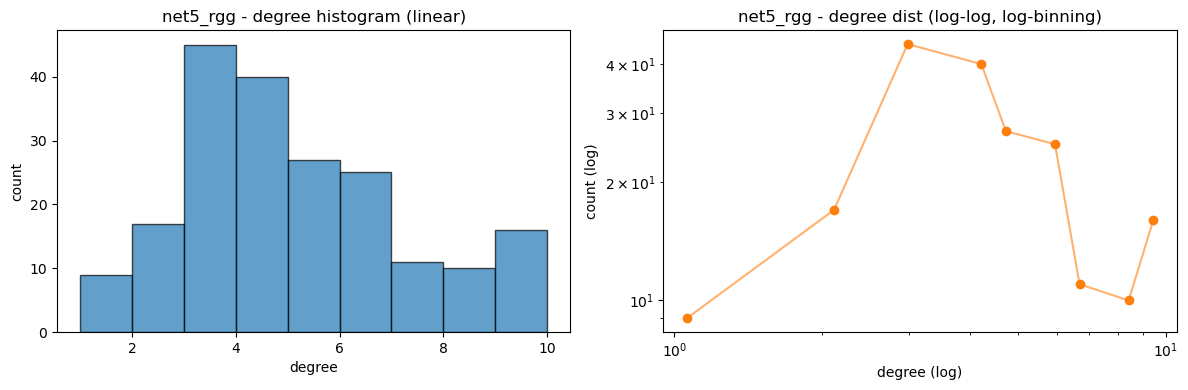

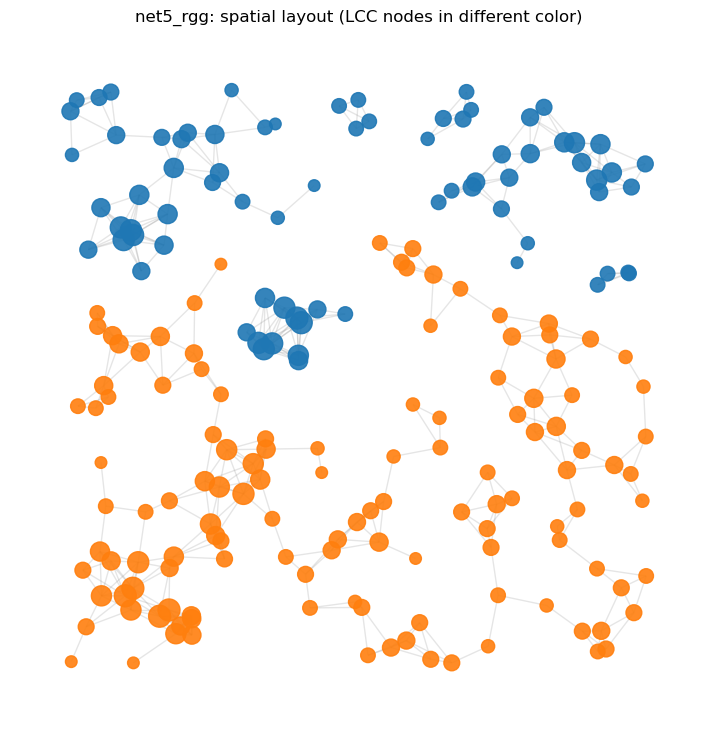

edge euclidean distance (min/mean/max/std): 0.002052 / 0.059126 / 0.089979 / 0.021205


In [51]:
import networkx as _nx
import numpy as _np

# Basic analysis and visualization for net5_rgg
# Relies on existing globals: net5_rgg, net5 (optional), pos_net5 / pos / positions, nx, np, plt

import matplotlib.pyplot as _plt

# allow either pre-imported names or the safe local ones above
nx = globals().get("nx", _nx)
np = globals().get("np", _np)
plt = globals().get("plt", _plt)

G = globals().get("net5_rgg")
if G is None:
    raise RuntimeError("net5_rgg not found in globals. Run the RGG reconstruction cell first.")

# summary statistics
n = G.number_of_nodes()
m = G.number_of_edges()
degs = [d for _, d in G.degree()]
deg_min = min(degs) if degs else 0
deg_max = max(degs) if degs else 0
deg_avg = sum(degs) / len(degs) if degs else 0.0
try:
    avg_clust = nx.average_clustering(G)
except Exception:
    avg_clust = float('nan')

comps = list(nx.connected_components(G))
n_comp = len(comps)
largest_cc = max(comps, key=len) if comps else set()
lcc_size = len(largest_cc)

# average path length / diameter on LCC (if sensible)
if lcc_size > 1:
    H = G.subgraph(largest_cc)
    try:
        apl = nx.average_shortest_path_length(H)
        diam = nx.diameter(H)
    except Exception:
        apl = float('nan')
        diam = float('nan')
else:
    apl = float('nan')
    diam = float('nan')

print(f"net5_rgg: nodes={n}, edges={m}")
print(f"degree: min={deg_min}, max={deg_max}, avg={deg_avg:.3f}")
print(f"avg_clustering={avg_clust:.6f}")
print(f"connected components={n_comp}, largest_cc_size={lcc_size}")
print(f"avg_path_length(LCC)={apl}, diameter(LCC)={diam}")

if len(degs) == 0:
    print("Graph has no nodes/edges to plot.")
else:
    # Degree distribution: linear + log-log (log-binning)
    deg_list = np.array(degs)
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].hist(deg_list, bins='auto', color='C0', edgecolor='k', alpha=0.7)
    axes[0].set_title("net5_rgg - degree histogram (linear)")
    axes[0].set_xlabel("degree")
    axes[0].set_ylabel("count")

    # log-binned histogram
    deg_min_pos = max(1, int(deg_min))
    deg_max_pos = max(deg_max, deg_min_pos + 1)
    nbins = 20
    # ensure deg_max_pos > deg_min_pos for logspace
    if deg_max_pos <= deg_min_pos:
        deg_max_pos = deg_min_pos * 10
    bins = np.logspace(np.log10(deg_min_pos), np.log10(deg_max_pos), nbins + 1)
    counts, edges = np.histogram(deg_list, bins=bins)
    centers = np.sqrt(edges[:-1] * edges[1:])
    nonzero = counts > 0

    if nonzero.any():
        axes[1].scatter(centers[nonzero], counts[nonzero], color='C1')
        axes[1].plot(centers[nonzero], counts[nonzero], color='C1', alpha=0.6)
    else:
        axes[1].text(0.5, 0.5, "no data in log-bins", ha='center')
    axes[1].set_xscale('log'); axes[1].set_yscale('log')
    axes[1].set_xlabel("degree (log)")
    axes[1].set_ylabel("count (log)")
    axes[1].set_title("net5_rgg - degree dist (log-log, log-binning)")

    plt.tight_layout()
    plt.show()

# Spatial visualization using provided positions if available, fallback to spring layout
pos_map = (globals().get('pos_net5') or globals().get('pos') or globals().get('positions')
           or nx.get_node_attributes(G, 'pos') or {})

def _pos_for_node(node, posmap):
    if node in posmap:
        return posmap[node]
    s = str(node)
    if s in posmap:
        return posmap[s]
    try:
        i = int(s)
        if i in posmap:
            return posmap[i]
    except Exception:
        pass
    return None

pos_plot = {}
if pos_map:
    for n in G.nodes():
        c = _pos_for_node(n, pos_map)
        if c is not None:
            try:
                pos_plot[n] = (float(c[0]), float(c[1]))
            except Exception:
                # skip invalid coords
                pass

if not pos_plot:
    pos_plot = nx.spring_layout(G, seed=42)

# Prepare plotting: color nodes by membership in LCC, size by degree
node_colors = ['C1' if n in largest_cc else 'C0' for n in G.nodes()]
node_sizes = [50 + 20 * G.degree(n) for n in G.nodes()]

plt.figure(figsize=(9, 9))
# draw edges faintly
nx.draw_networkx_edges(G, pos_plot, edgelist=G.edges(), alpha=0.2, edge_color='gray')
# draw nodes
nx.draw_networkx_nodes(G, pos_plot, nodelist=list(G.nodes()), node_size=node_sizes, node_color=node_colors, alpha=0.9)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.title("net5_rgg: spatial layout (LCC nodes in different color)")
plt.show()

# Additional quick diagnostics: edge length distribution if positions available
if pos_plot and pos_map:
    dlist = []
    for u, v in G.edges():
        cu = _pos_for_node(u, pos_map); cv = _pos_for_node(v, pos_map)
        if cu is None or cv is None:
            continue
        try:
            dlist.append(np.hypot(float(cu[0]) - float(cv[0]), float(cu[1]) - float(cv[1])))
        except Exception:
            continue
    if dlist:
        darr = np.array(dlist)
        print(f"edge euclidean distance (min/mean/max/std): {darr.min():.6f} / {darr.mean():.6f} / {darr.max():.6f} / {darr.std():.6f}")

In [52]:
# Check isomorphism between net5 and net5_rgg using NetworkX built-ins.
# Assumes net5 and net5_rgg are already present in the notebook globals.

G1 = globals().get('net5')
G2 = globals().get('net5_rgg')

if G1 is None or G2 is None:
    raise RuntimeError("Both 'net5' and 'net5_rgg' must be present in globals.")

print(f"net5: nodes={G1.number_of_nodes()}, edges={G1.number_of_edges()}")
print(f"net5_rgg: nodes={G2.number_of_nodes()}, edges={G2.number_of_edges()}")

# Quick rejection: different number of nodes or edges => not isomorphic
if G1.number_of_nodes() != G2.number_of_nodes() or G1.number_of_edges() != G2.number_of_edges():
    print("Graphs have different node/edge counts -> not isomorphic (structurally).")
    is_iso = False
    mapping = None
else:
    # Use the high-level convenience function (uses GraphMatcher internally)
    is_iso = nx.is_isomorphic(G1, G2)
    mapping = None
    print(f"nx.is_isomorphic -> {is_iso}")

    # If isomorphic, get an explicit mapping via GraphMatcher (one possible automorphism)
    if is_iso:
        GM = nx.algorithms.isomorphism.GraphMatcher(G1, G2)
        if GM.is_isomorphic():
            mapping = GM.mapping  # mapping: node_in_G1 -> node_in_G2
            print(f"Found one isomorphism mapping (showing up to 10 entries):")
            for i, (u, v) in enumerate(mapping.items()):
                print(f"  {u} -> {v}")
                if i >= 9:
                    break
        else:
            print("nx.is_isomorphic reported True but GraphMatcher did not find a mapping (unexpected).")

# expose results in variables for further cells
isomorphism_result = is_iso
isomorphism_mapping = mapping
(isomorphism_result, isomorphism_mapping)

net5: nodes=200, edges=465
net5_rgg: nodes=200, edges=465
nx.is_isomorphic -> True
Found one isomorphism mapping (showing up to 10 entries):
  0 -> 0
  33 -> 18
  18 -> 33
  37 -> 37
  1 -> 1
  48 -> 47
  47 -> 48
  51 -> 51
  52 -> 52
  62 -> 62


(True,
 {'0': '0',
  '33': '18',
  '18': '33',
  '37': '37',
  '1': '1',
  '48': '47',
  '47': '48',
  '51': '51',
  '52': '52',
  '62': '62',
  '74': '74',
  '29': '29',
  '2': '2',
  '23': '23',
  '39': '39',
  '70': '70',
  '194': '76',
  '123': '77',
  '84': '84',
  '99': '99',
  '105': '105',
  '114': '114',
  '77': '123',
  '129': '129',
  '135': '135',
  '82': '82',
  '137': '137',
  '138': '138',
  '144': '144',
  '145': '145',
  '148': '148',
  '120': '120',
  '53': '53',
  '154': '154',
  '155': '155',
  '165': '165',
  '170': '170',
  '171': '171',
  '174': '174',
  '100': '100',
  '20': '20',
  '6': '6',
  '17': '17',
  '4': '4',
  '58': '58',
  '75': '64',
  '161': '66',
  '64': '75',
  '111': '111',
  '112': '112',
  '118': '118',
  '179': '161',
  '176': '176',
  '177': '177',
  '78': '78',
  '44': '44',
  '59': '59',
  '21': '21',
  '68': '68',
  '108': '108',
  '115': '115',
  '121': '121',
  '104': '104',
  '25': '25',
  '10': '10',
  '24': '24',
  '32': '32',
  '57':

#### Conclusions about net5 structure and model

### FInal conclusions...